In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [3]:
file_path = 'data/Online Retail.xlsx'
data = pd.read_excel(file_path)

In [4]:
print(data.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [5]:
data["InvoiceNo"] = data["InvoiceNo"].astype(str)
data["StockCode"] = data["StockCode"].astype(str)
data["Description"] = data["Description"].astype(str)
data["Country"] = data["Country"].astype(str)

In [6]:
parquet_path = 'data/online_retail.parquet'
data.to_parquet(parquet_path, engine='fastparquet', index=False)

parquet으로 불러오면 excel이나 csv보다는 훨씬 빨리 데이터를 불러올 수 있다.

In [7]:
df = pd.read_parquet(parquet_path)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
df["InvoiceNo"] = df["InvoiceNo"].astype("category")
df["StockCode"] = df["StockCode"].astype("category")
df["Description"] = df["Description"].astype("category")
df["InvoiceDate"] = df["InvoiceDate"].astype("category")
df["Country"] = df["Country"].astype("category")
df["Quantity"] = df["Quantity"].astype("int32")
df["UnitPrice"] = df["UnitPrice"].astype("float64")
df["CustomerID"] = df["CustomerID"].astype("float32")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  541909 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
dtypes: category(5), float32(1), float64(1), int32(1)
memory usage: 15.1 MB


In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.689453
std,218.081158,96.759853,1713.600342
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


describe에서 알 수 있는 정보
- 빈도수, 평균, 표준편차, 최소값, 4분위값, 최대값

In [15]:
df.describe(exclude='number')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,541909,541909,541909
unique,25900,4070,4224,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2011-10-31 14:41:00,United Kingdom
freq,1114,2313,2369,1114,495478


In [16]:
df.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


결측치 보기

In [17]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

CustomerID의 결측치는 왜 많을까? => 아마도 비회원 주문일 수 있습니다.

In [18]:
df.shape

(541909, 8)

* CustomerID 결측치 비율을 구해봅시다.

In [19]:
df.isnull().mean() * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

* 결측치를 시각화하기


<Axes: >

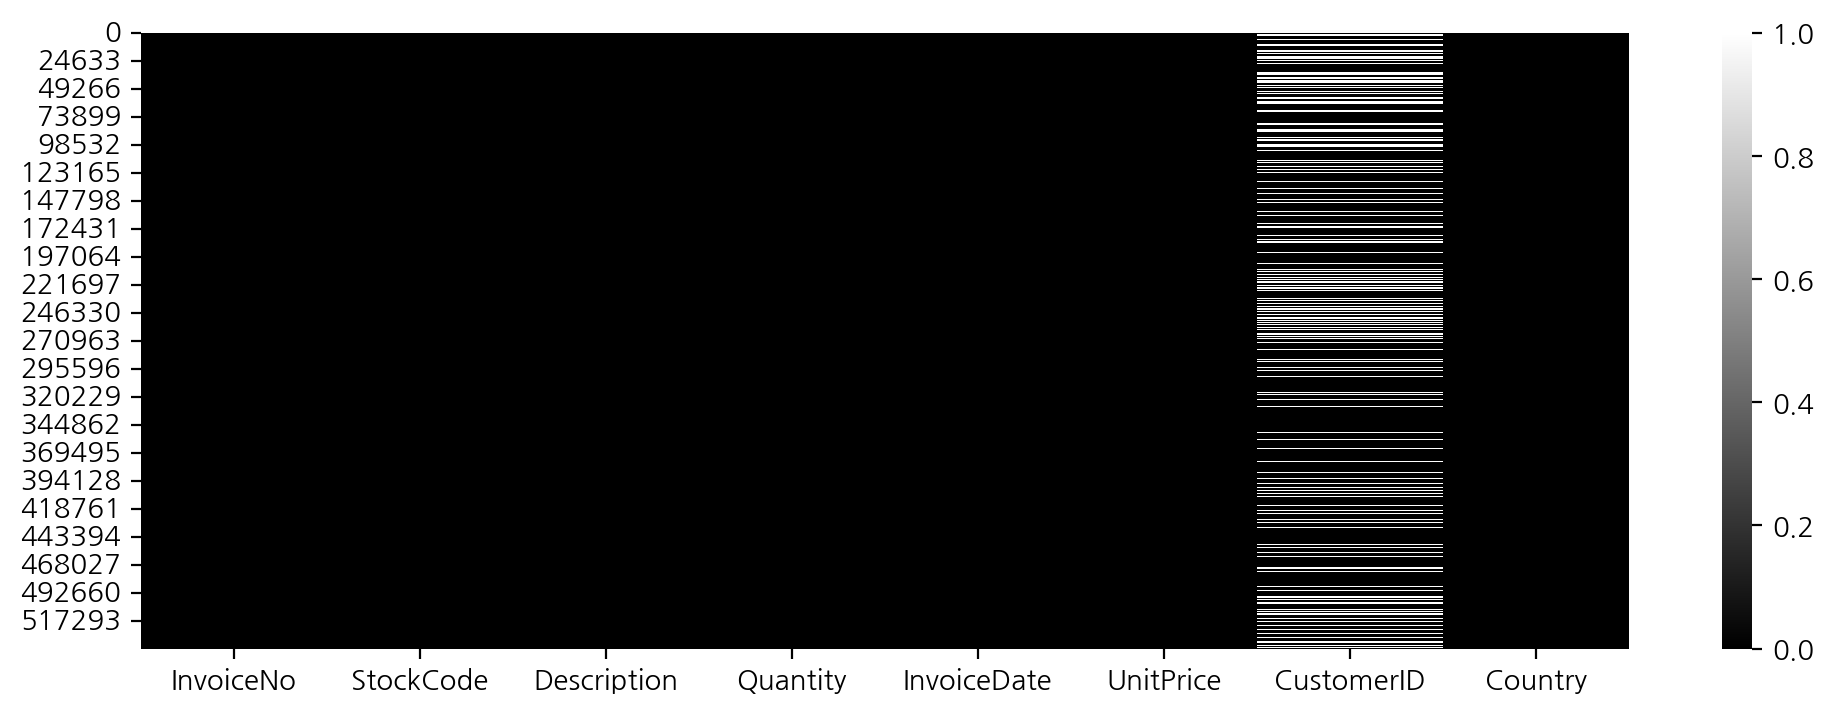

In [20]:
plt.figure(figsize=(12, 4))
sns.heatmap(df.isnull(), cmap='gray')

## 히스토그램으로 전체 수치변수 시각화하기

In [21]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.689453
std,218.081158,96.759853,1713.600342
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


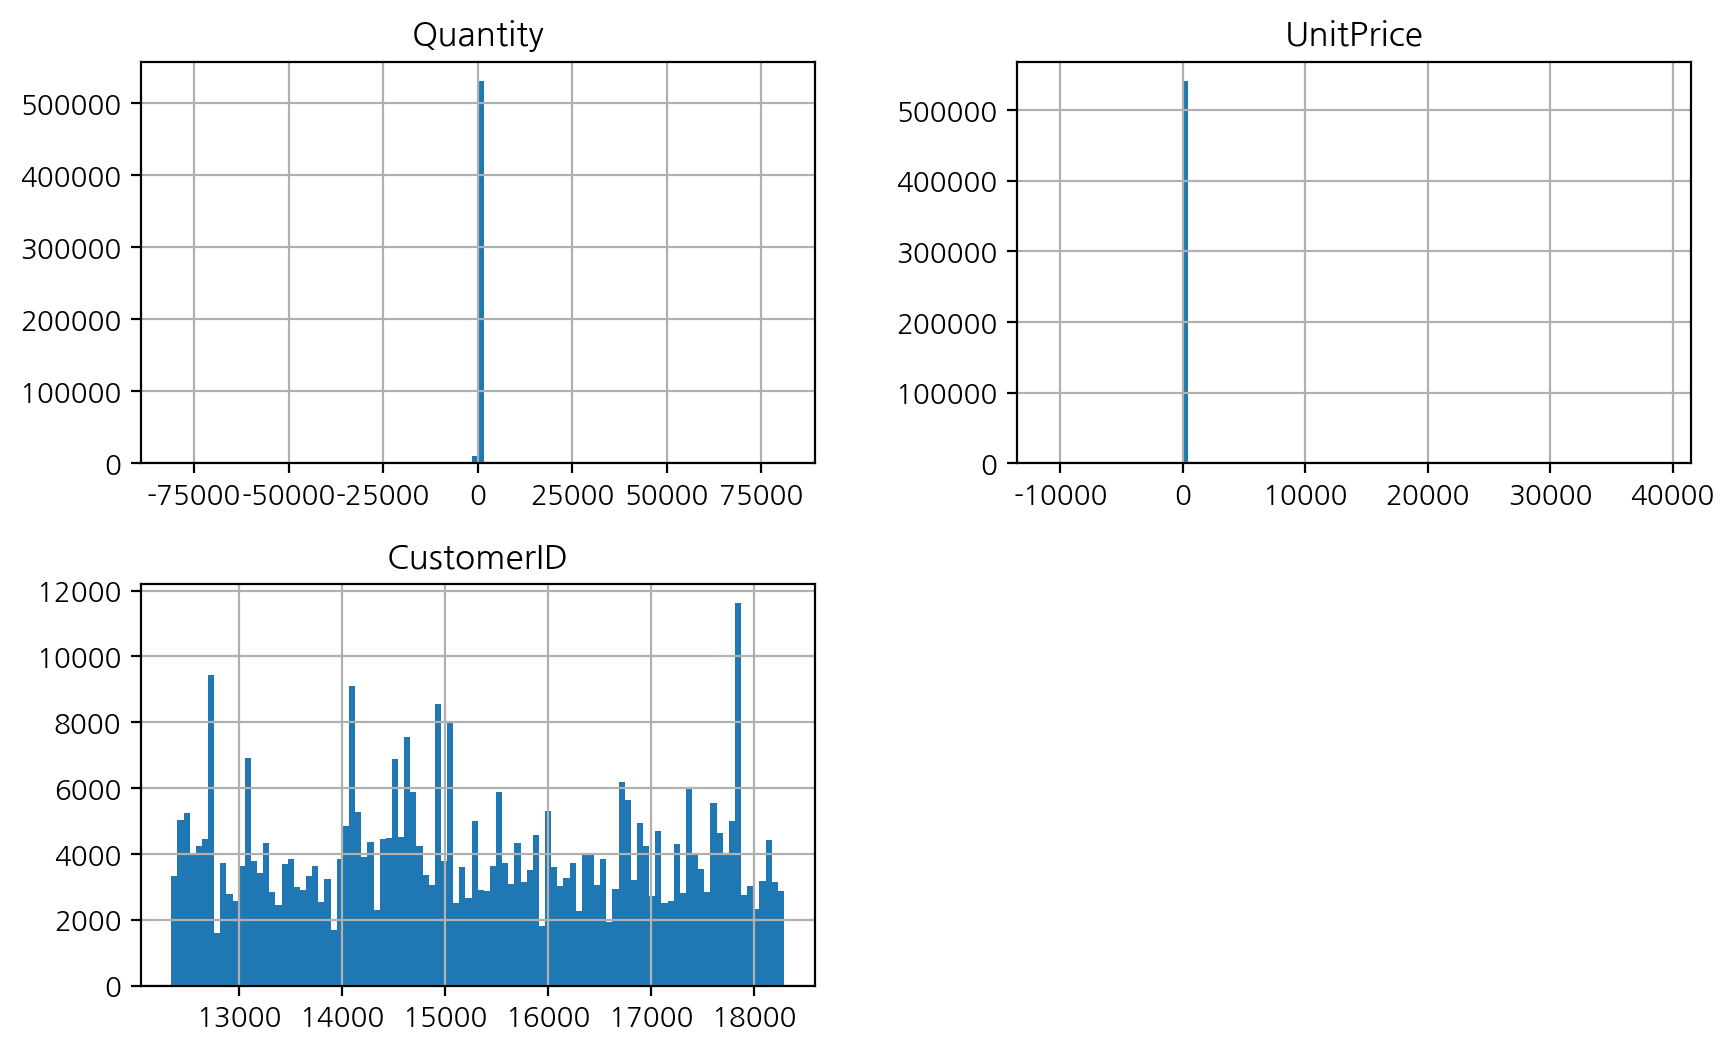

In [22]:
df.hist(figsize=(10, 6), bins=100);

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  541909 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
dtypes: category(5), float32(1), float64(1), int32(1)
memory usage: 15.1 MB


## 전체 주문금액 파생변수 만들기

In [24]:
# TotalPrice는 RFM 중 MonetaryValue의 값이 됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


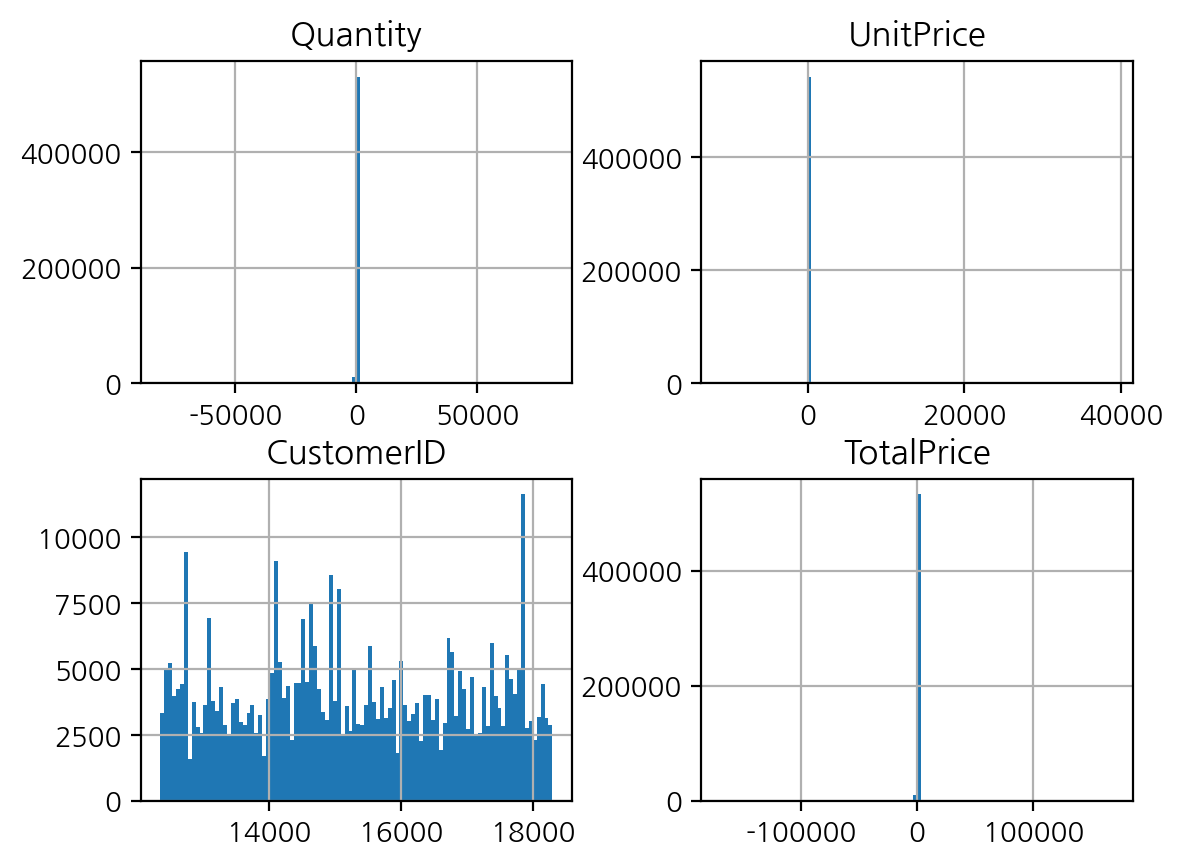

In [25]:
df.hist(bins=100);

## 회원 vs 비회원 구매

In [26]:
# isnull => 비회원, notnull => 회원
df['CustomerID'].isnull().value_counts(normalize=True)

CustomerID
False    0.750733
True     0.249267
Name: proportion, dtype: float64

In [27]:
# 영국이 아닌 다른나라가 비회원을 많이 했을 가능성이 있음
# CustomerID값이 결측치가 아닌 값에 대한 Country값을 가져와 빈도수를 구합니다.
df.loc[df['CustomerID'].notnull(), 'Country'].value_counts()

Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [28]:
# df['isRegistered']
df['isRegistered'] = df['CustomerID'].notnull()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,True
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,True
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,True
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,True
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,True


In [29]:
pd.crosstab(df['Country'], df['isRegistered']).sort_values(True, ascending=False)

isRegistered,False,True
Country,,
United Kingdom,133600,361878
Germany,0,9495
France,66,8491
EIRE,711,7485
Spain,0,2533
Netherlands,0,2371
Belgium,0,2069
Switzerland,125,1877
Portugal,39,1480


## 구매 취소 비율

In [30]:
df['InvoiceCode'] = df['InvoiceNo'].str.replace('[0-9]', '', regex=True)
df['InvoiceCode'].value_counts()

InvoiceCode
     532618
C      9288
A         3
Name: count, dtype: int64

In [31]:
df['isCancel'] = (df["InvoiceCode"] == 'C')

In [32]:
pd.crosstab(df["isRegistered"], df['InvoiceCode'])

InvoiceCode,,A,C
isRegistered,,,
False,134694,3,383
True,397924,0,8905


In [33]:
df[df["InvoiceCode"] == 'A']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,11062.06,False,A,False
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,-11062.06,False,A,False
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,-11062.06,False,A,False


In [34]:
df.shape

(541909, 12)

In [35]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,True,,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,True,,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,True,,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,True,,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,True,,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,True,,False


In [36]:
df["CustomerID"].notnull()

0         True
1         True
2         True
3         True
4         True
          ... 
541904    True
541905    True
541906    True
541907    True
541908    True
Name: CustomerID, Length: 541909, dtype: bool

In [37]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,True,C,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,True,C,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,True,C,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,True,C,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,True,C,True
...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,True,C,True
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,True,C,True
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,True,C,True
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,True,C,True


In [38]:
df.loc[df['Quantity'] < 0, 'InvoiceCode'].value_counts()

InvoiceCode
C    9288
     1336
Name: count, dtype: int64

In [39]:
df[(df['Quantity'] < 0) & (df['InvoiceCode'] != 'C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel
2406,536589,21777,nan,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,-0.0,False,,False
4347,536764,84952C,nan,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom,-0.0,False,,False
7188,536996,22712,nan,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,-0.0,False,,False
7189,536997,22028,nan,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,-0.0,False,,False
7190,536998,85067,nan,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom,-0.0,False,,False
...,...,...,...,...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom,-0.0,False,,False
535335,581212,22578,lost,-1050,2011-12-07 18:38:00,0.0,NaN,United Kingdom,-0.0,False,,False
535336,581213,22576,check,-30,2011-12-07 18:38:00,0.0,NaN,United Kingdom,-0.0,False,,False
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,NaN,United Kingdom,-0.0,False,,False


In [40]:
df.loc[(df['Quantity'] < 0) & (df['InvoiceCode'] != 'C'), 'Description'].value_counts()

Description
nan                         862
check                       120
damages                      45
damaged                      42
?                            41
                           ... 
ABC TREASURE BOOK BOX         0
A4 WALL TIDY RED FLOWERS      0
A4 WALL TIDY BLUE OFFICE      0
A PRETTY THANK YOU CARD       0
website fixed                 0
Name: count, Length: 4224, dtype: int64

In [41]:
df[df['Description'] == 'check']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel
13217,537425,84968F,check,-20,2010-12-06 15:35:00,0.0,NaN,United Kingdom,-0.0,False,,False
13218,537426,84968E,check,-35,2010-12-06 15:36:00,0.0,NaN,United Kingdom,-0.0,False,,False
108577,545546,84249A,check,-150,2011-03-03 15:03:00,0.0,NaN,United Kingdom,-0.0,False,,False
113580,545990,84598,check,-3000,2011-03-08 13:07:00,0.0,NaN,United Kingdom,-0.0,False,,False
381676,569875,90195A,check,-45,2011-10-06 15:07:00,0.0,NaN,United Kingdom,-0.0,False,,False
...,...,...,...,...,...,...,...,...,...,...,...,...
535325,581202,23404,check,41,2011-12-07 18:30:00,0.0,NaN,United Kingdom,0.0,False,,False
535331,581208,72801C,check,-10,2011-12-07 18:35:00,0.0,NaN,United Kingdom,-0.0,False,,False
535333,581210,23395,check,-26,2011-12-07 18:36:00,0.0,NaN,United Kingdom,-0.0,False,,False
535334,581211,22142,check,14,2011-12-07 18:36:00,0.0,NaN,United Kingdom,0.0,False,,False


In [42]:
df.loc[(df['Quantity'] < 0) & (df['InvoiceCode'] != 'C'), 'Quantity'].describe()

count    1336.000000
mean     -154.907934
std       588.292456
min     -9600.000000
25%       -84.000000
50%       -30.000000
75%        -8.000000
max        -1.000000
Name: Quantity, dtype: float64

In [43]:
df.loc[(df["UnitPrice"] < 0), "InvoiceCode"].value_counts()

InvoiceCode
A    2
Name: count, dtype: int64

In [44]:
df.loc[(df["UnitPrice"] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,-11062.06,False,A,False
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,-11062.06,False,A,False


In [45]:
df_valid = df.loc[df['CustomerID'].notnull() & (df['Quantity'] > 0) & (df['UnitPrice'] > 0)].copy()

df.shape, df_valid.shape

((541909, 12), (397884, 12))

In [46]:
df_valid = df_valid.drop_duplicates().copy()

df_valid.shape

(392692, 12)

## 날짜와 시간

In [47]:
df_valid

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,True,,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,True,,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,True,,False
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,True,,False
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,True,,False
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,True,,False


In [48]:
df_valid['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 392692, dtype: category
Categories (23260, datetime64[ns]): [2010-12-01 08:26:00, 2010-12-01 08:28:00, 2010-12-01 08:34:00, 2010-12-01 08:35:00, ..., 2011-12-09 12:25:00, 2011-12-09 12:31:00, 2011-12-09 12:49:00, 2011-12-09 12:50:00]

비즈니스 데이터 분석 [2/7] 
12:00

In [49]:
df_valid['InvoiceDate'] = pd.to_datetime(df_valid['InvoiceDate'])

In [50]:
df_valid['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 392692, dtype: datetime64[ns]

In [51]:
df_valid['InvoiceYear'] = df_valid['InvoiceDate'].dt.year
df_valid["InvoiceMonth"] = df_valid["InvoiceDate"].dt.month
df_valid["InvoiceDay"] = df_valid["InvoiceDate"].dt.day
df_valid["InvoiceDow"] = df_valid["InvoiceDate"].dt.dayofweek

In [52]:
df_valid.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,True,,False,2010,12,1,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False,2010,12,1,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,True,,False,2010,12,1,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False,2010,12,1,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False,2010,12,1,2


In [53]:
df_valid['InvoiceYM'] = df['InvoiceDate'].astype(str).str[:7]
df_valid[['InvoiceDate', 'InvoiceYM']].sample(2)

,InvoiceDate,InvoiceYM
450103,2011-11-08 16:55:00,2011-11
421023,2011-10-26 16:21:00,2011-10


In [54]:
df_valid['InvoiceTime'] = df_valid['InvoiceDate'].dt.time
df_valid["InvoiceHour"] = df_valid["InvoiceDate"].dt.hour
df_valid.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceYM,InvoiceTime,InvoiceHour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,True,,False,2010,12,1,2,2010-12,08:26:00,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False,2010,12,1,2,2010-12,08:26:00,8


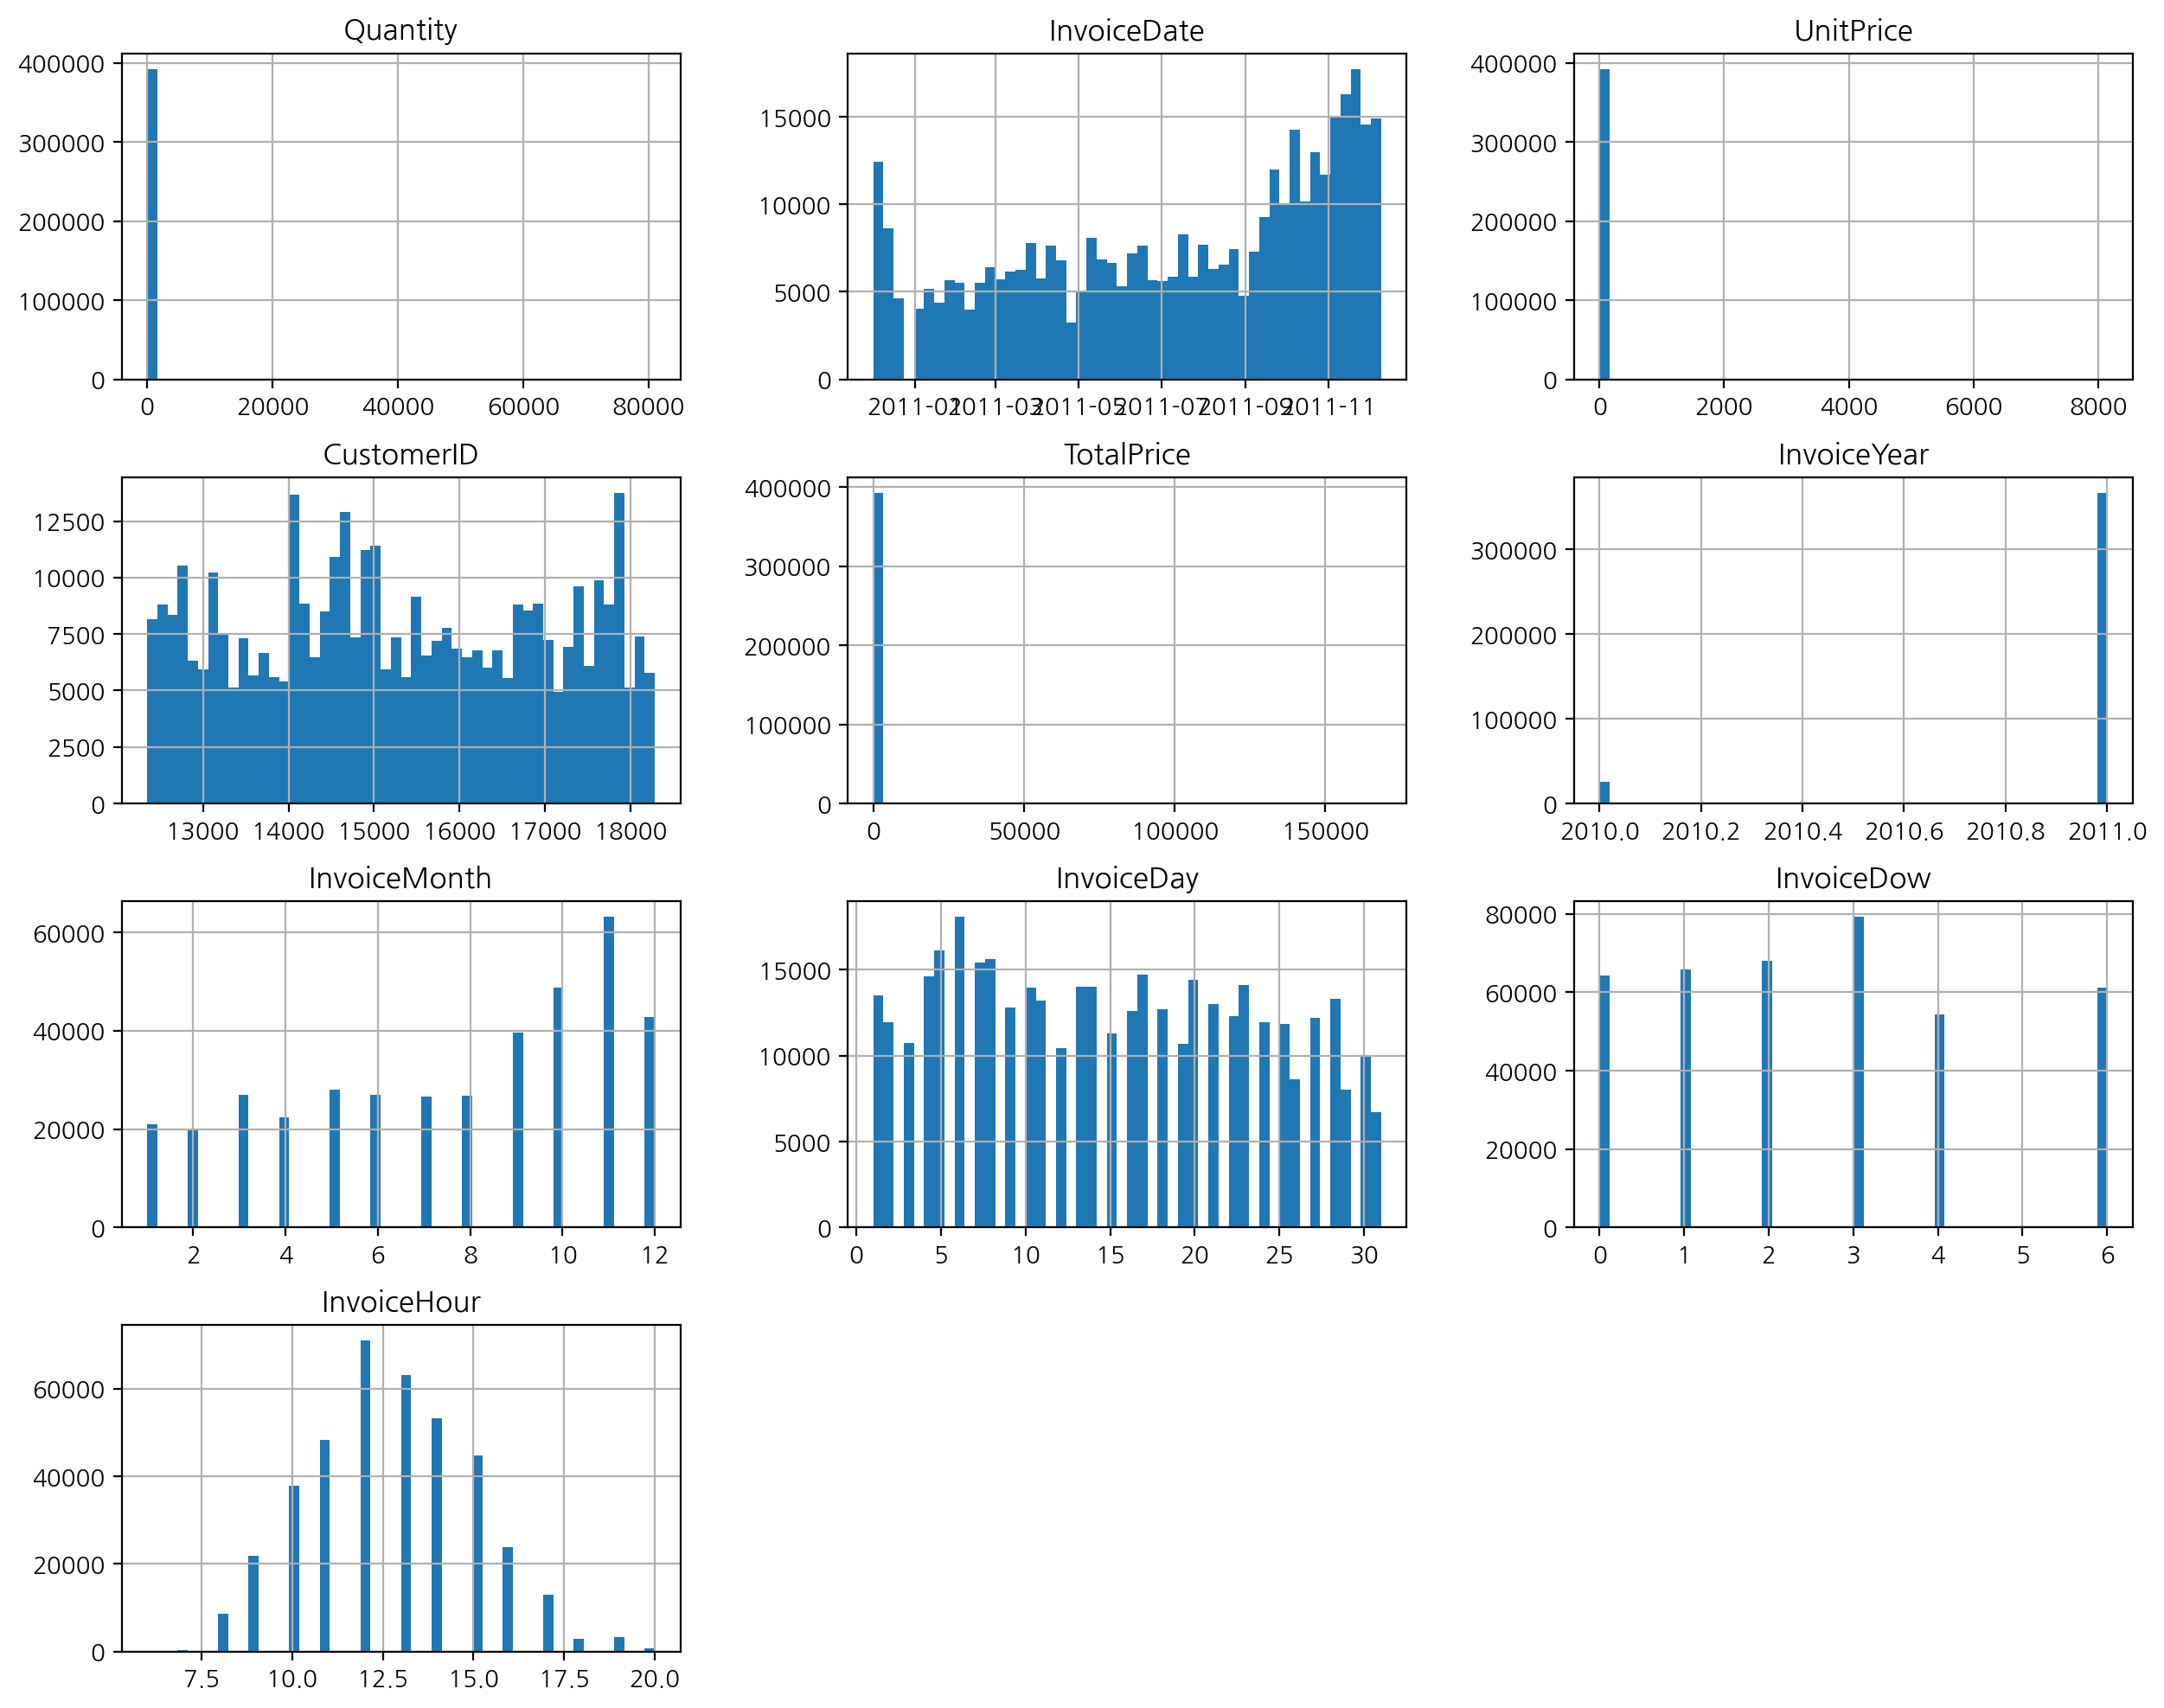

In [55]:
df_valid.hist(figsize=(15,12), bins=50);

### 연도별 구매 빈도수 시각화

<Axes: xlabel='InvoiceYear', ylabel='count'>

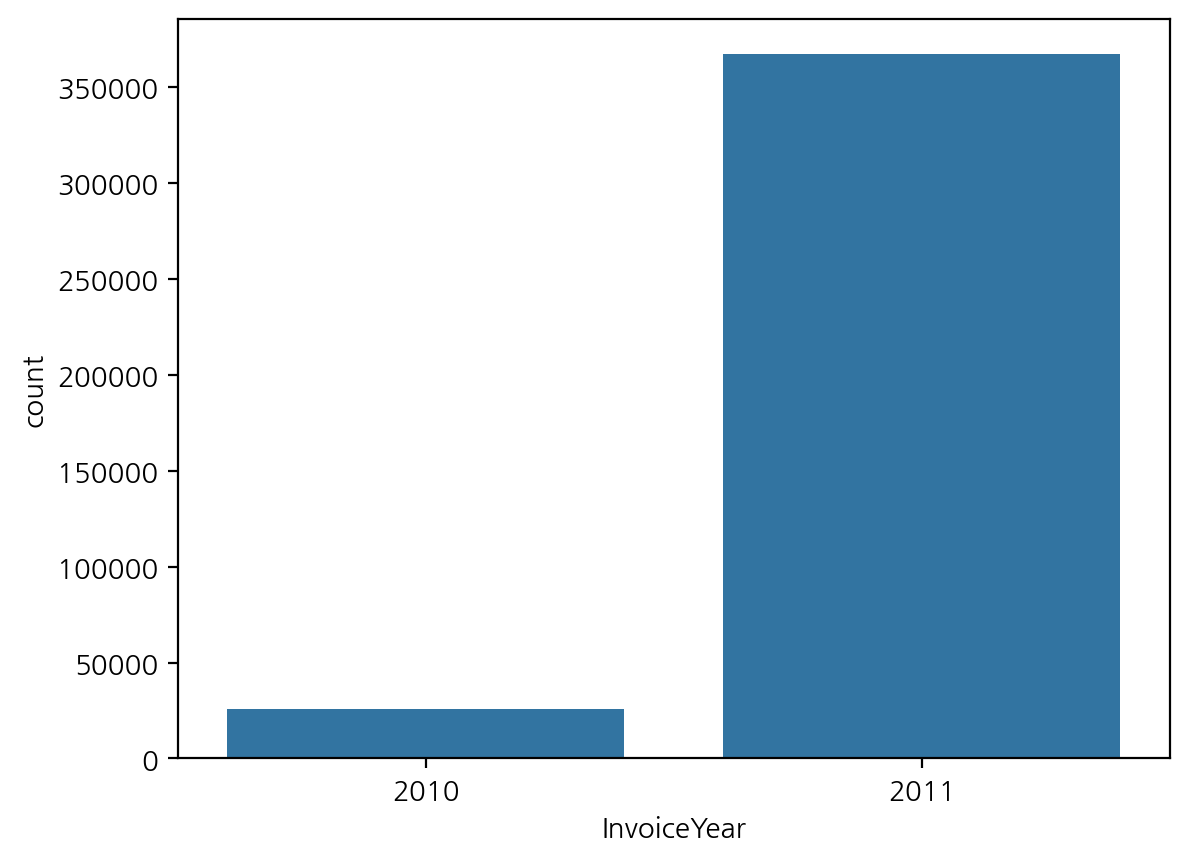

In [56]:
sns.countplot(data=df_valid, x='InvoiceYear')

<Axes: xlabel='InvoiceMonth', ylabel='count'>

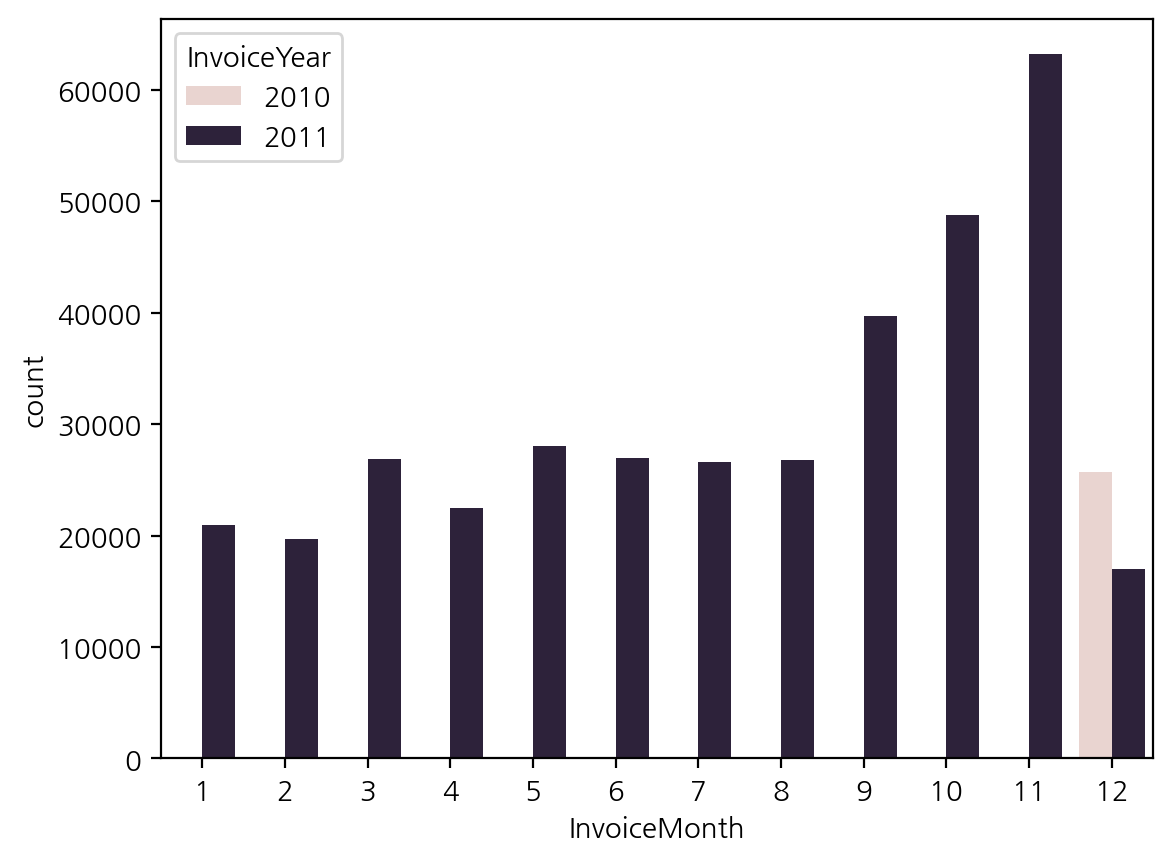

In [57]:
sns.countplot(data=df_valid, x="InvoiceMonth", hue="InvoiceYear")

<Axes: xlabel='InvoiceMonth', ylabel='count'>

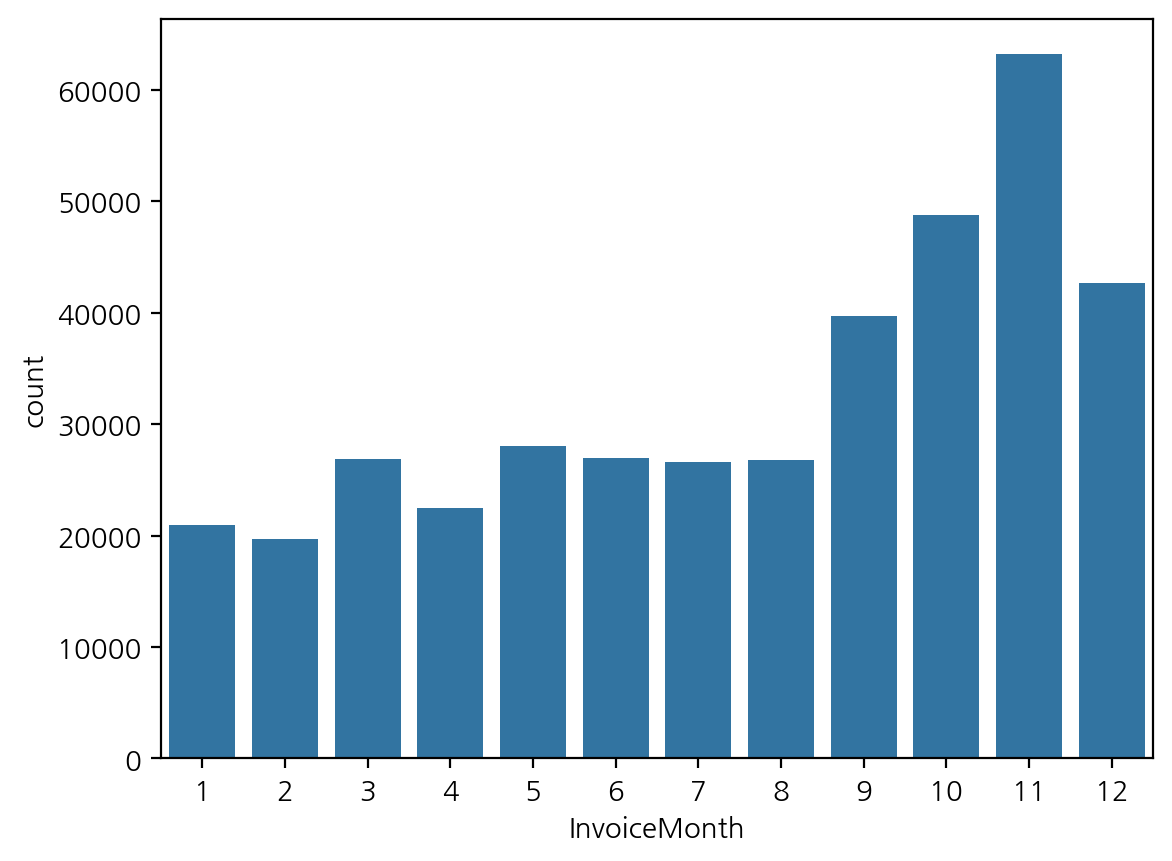

In [58]:
sns.countplot(data=df_valid, x="InvoiceMonth")

C:\Users\chobu\AppData\Local\Temp\ipykernel_16072\1104148702.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_valid, x='InvoiceYM', palette='pastel')


<Axes: xlabel='InvoiceYM', ylabel='count'>

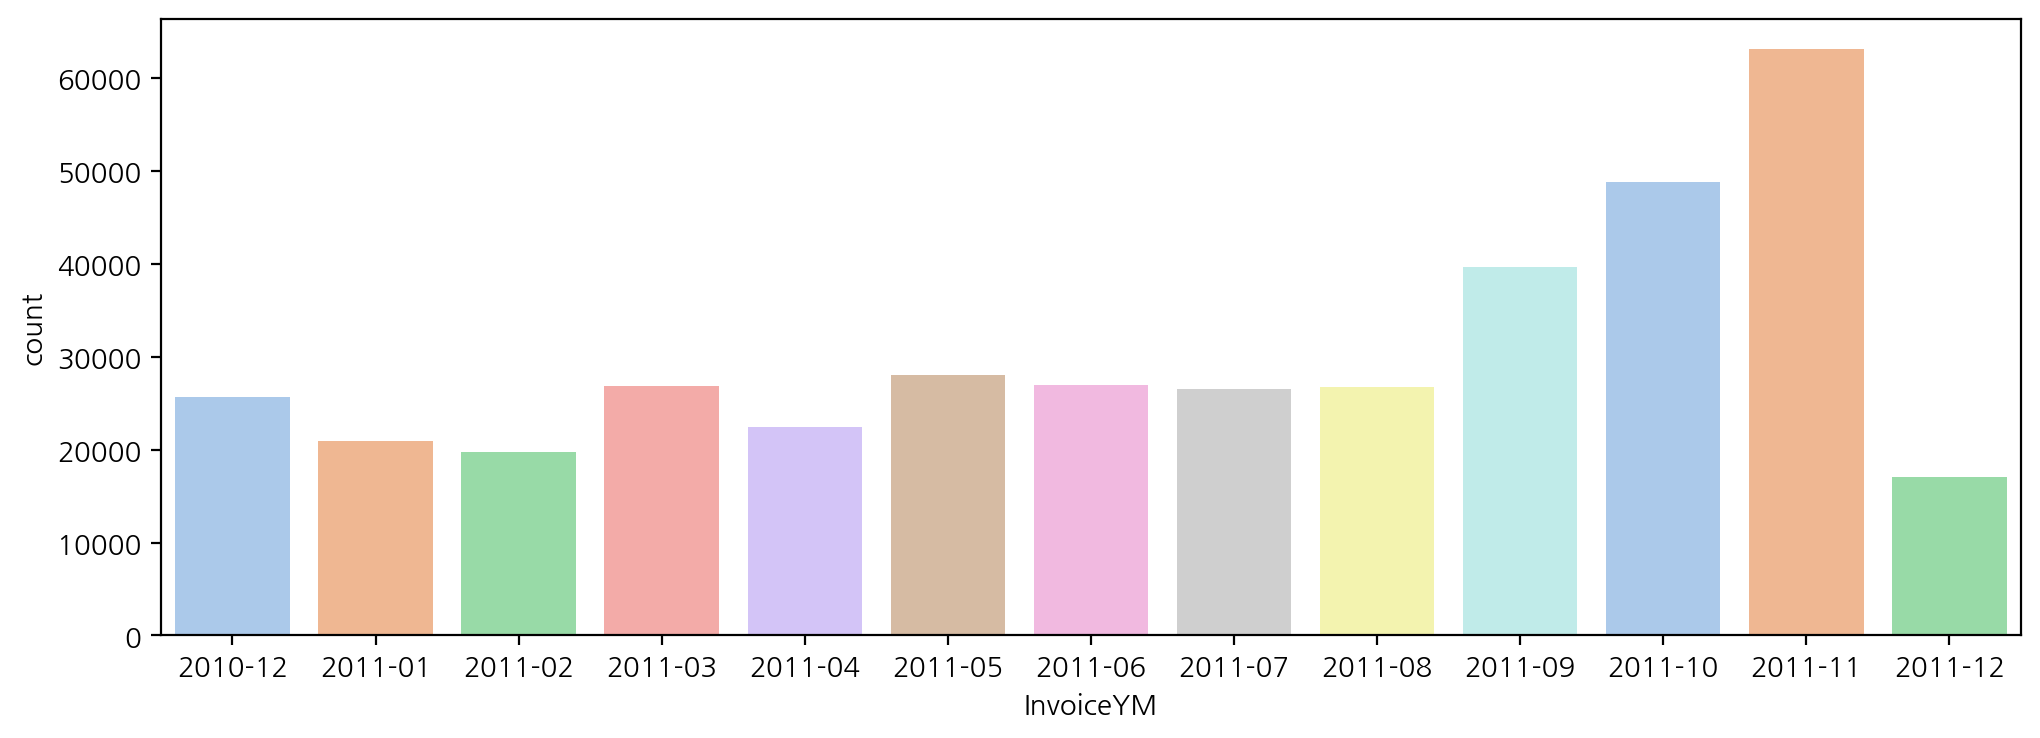

In [59]:
plt.figure(figsize=(12,4))
sns.countplot(data=df_valid, x='InvoiceYM', palette='pastel')

In [60]:
df_valid[df_valid['InvoiceYM'] == '2011-12'].shape

(17026, 19)

C:\Users\chobu\AppData\Local\Temp\ipykernel_16072\4158791863.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_valid, x="InvoiceDow", palette="muted")


<Axes: xlabel='InvoiceDow', ylabel='count'>

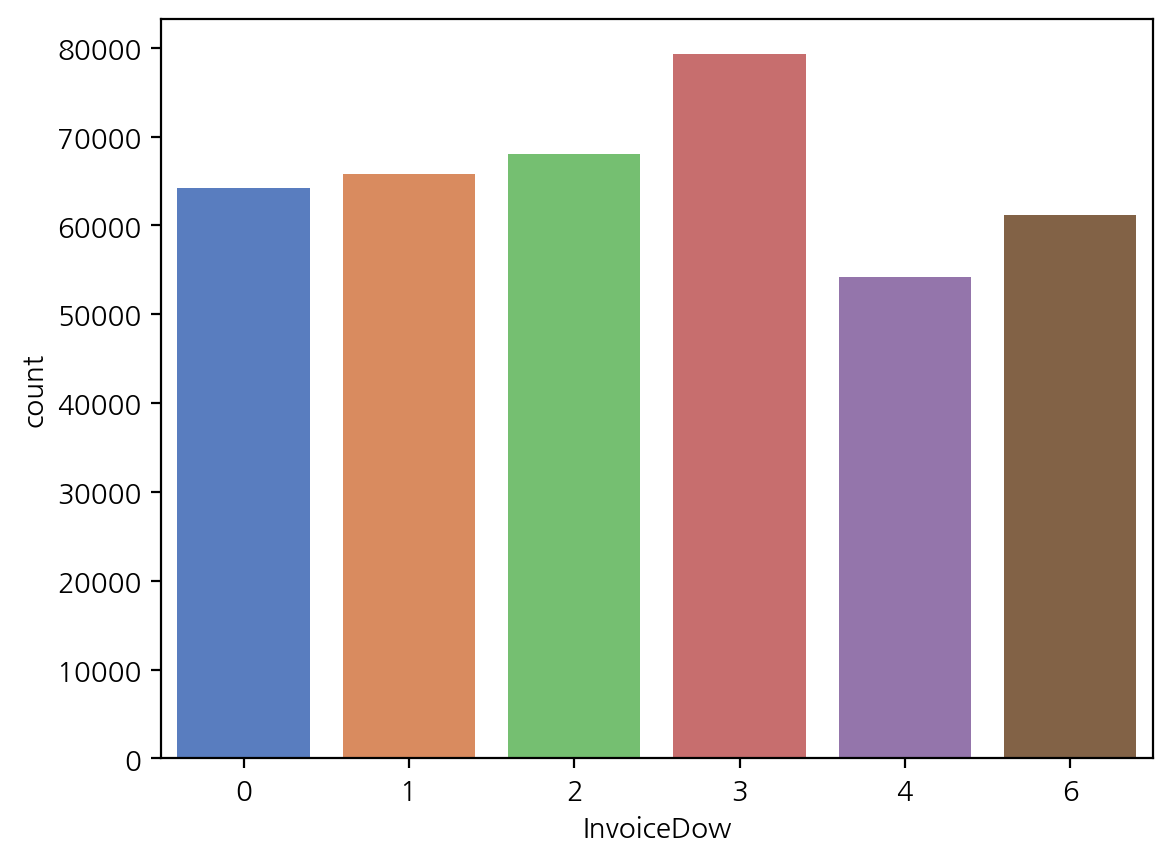

In [61]:
sns.countplot(data=df_valid, x="InvoiceDow", palette="muted")

In [62]:
df_valid['InvoiceDow'].value_counts().sort_index()

InvoiceDow
0    64231
1    65744
2    68040
3    79243
4    54222
6    61212
Name: count, dtype: int64

In [63]:
day_name = ['월', '화', '수', '목', '금', '토', '일']
day_name

['월', '화', '수', '목', '금', '토', '일']

In [64]:
day_name.remove('토')
day_name

['월', '화', '수', '목', '금', '일']

In [65]:
dow_count = df_valid["InvoiceDow"].value_counts().sort_index()
dow_count.index = day_name
dow_count

월    64231
화    65744
수    68040
목    79243
금    54222
일    61212
Name: count, dtype: int64

<Axes: >

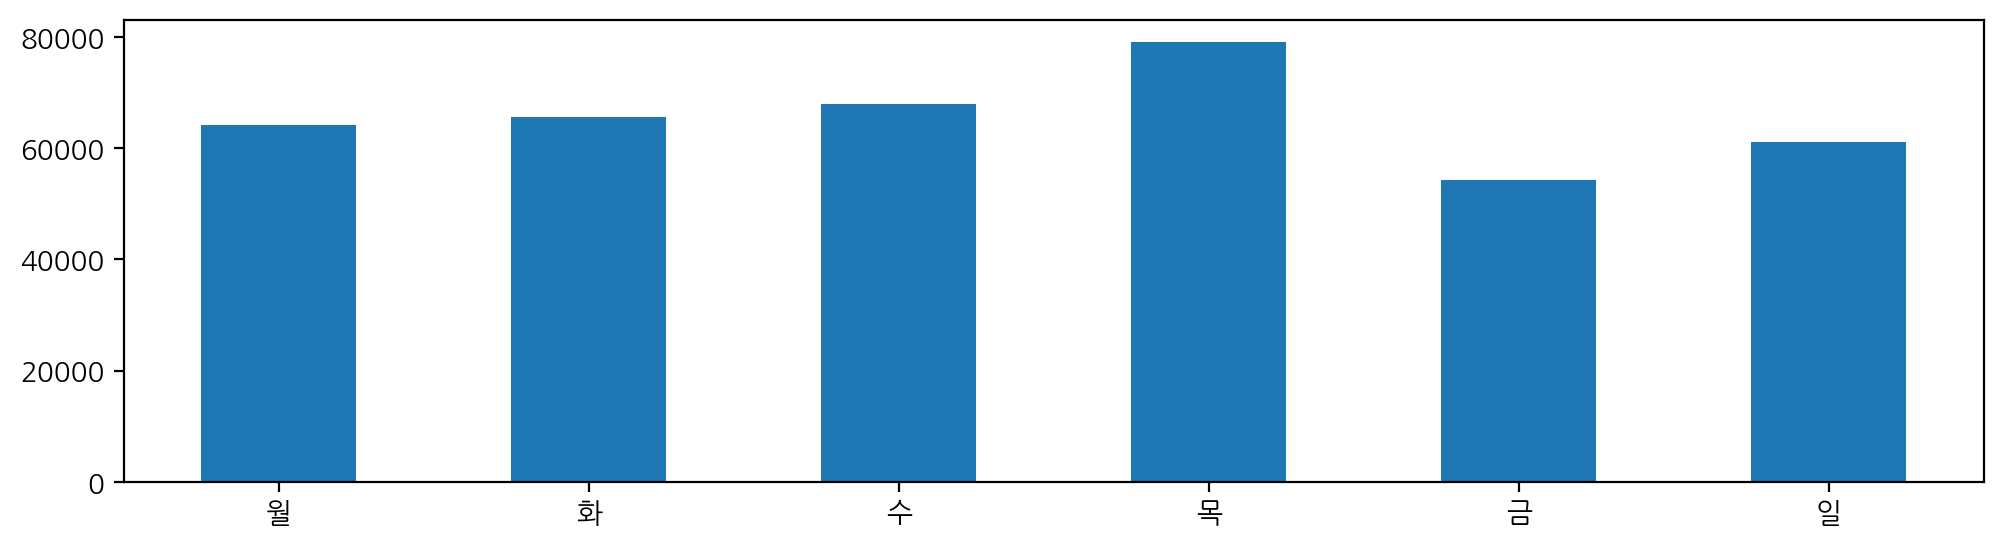

In [66]:
dow_count.plot.bar(figsize=(12,3), rot=0)

In [67]:
df_valid["InvoiceDayName"] = df_valid["InvoiceDow"].map(lambda x: "월화수목금토일"[x])

C:\Users\chobu\AppData\Local\Temp\ipykernel_16072\3172297923.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_valid, x='InvoiceDayName', order=list('월화수목금토일'), palette='muted')


<Axes: xlabel='InvoiceDayName', ylabel='count'>

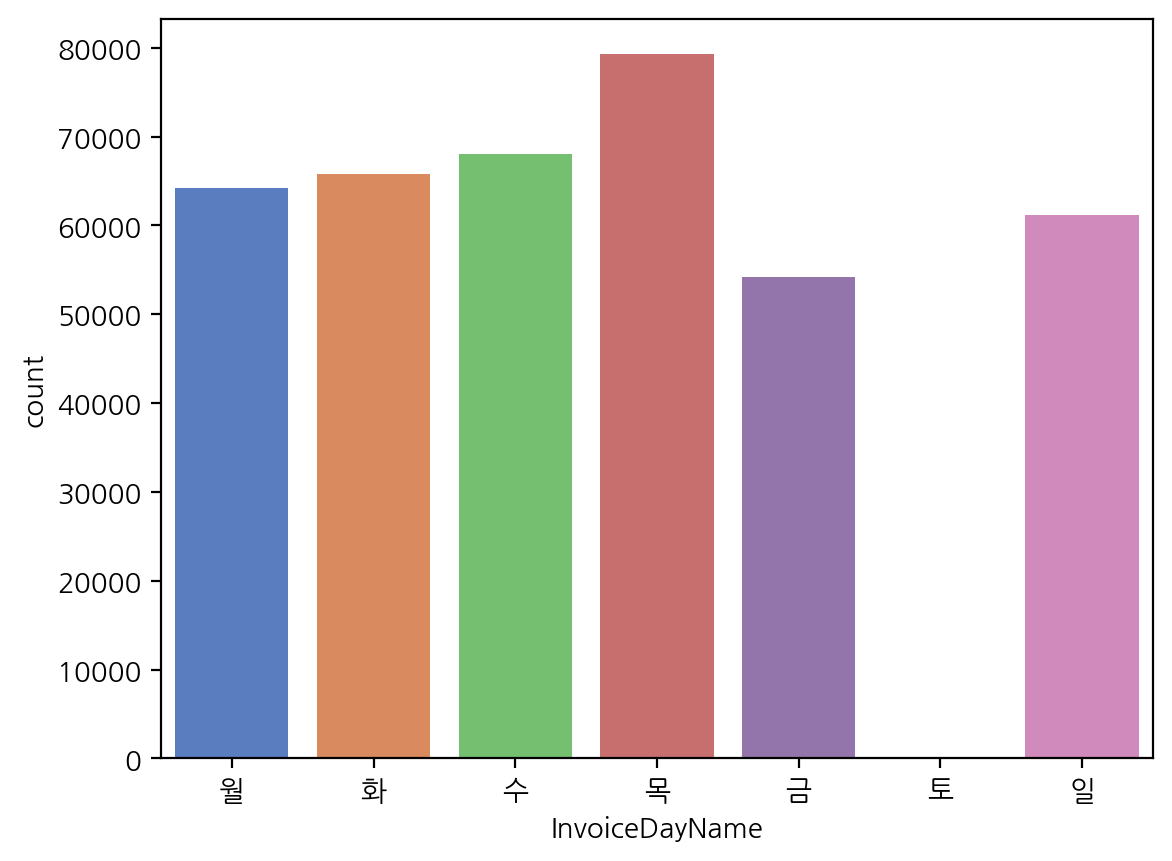

In [68]:
sns.countplot(data=df_valid, x='InvoiceDayName', order=list('월화수목금토일'), palette='muted')

28:07

<Axes: xlabel='InvoiceHour', ylabel='count'>

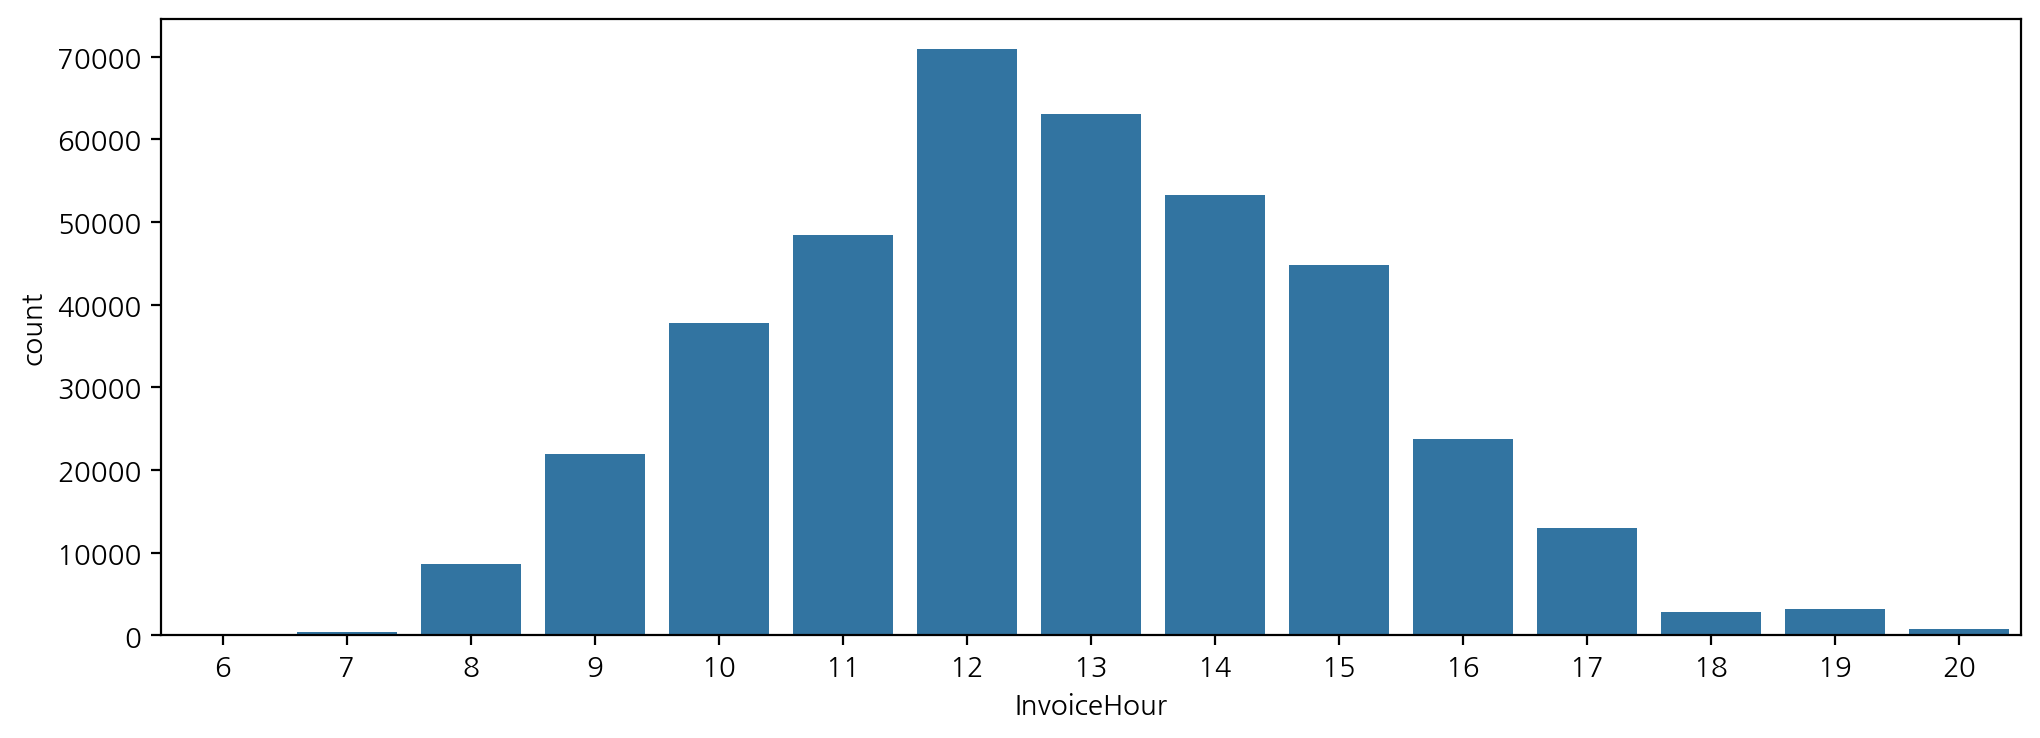

In [70]:
plt.figure(figsize=(12,4))
sns.countplot(data=df_valid, x='InvoiceHour')

Text(0.5, 1.0, '시간대별 주문량')

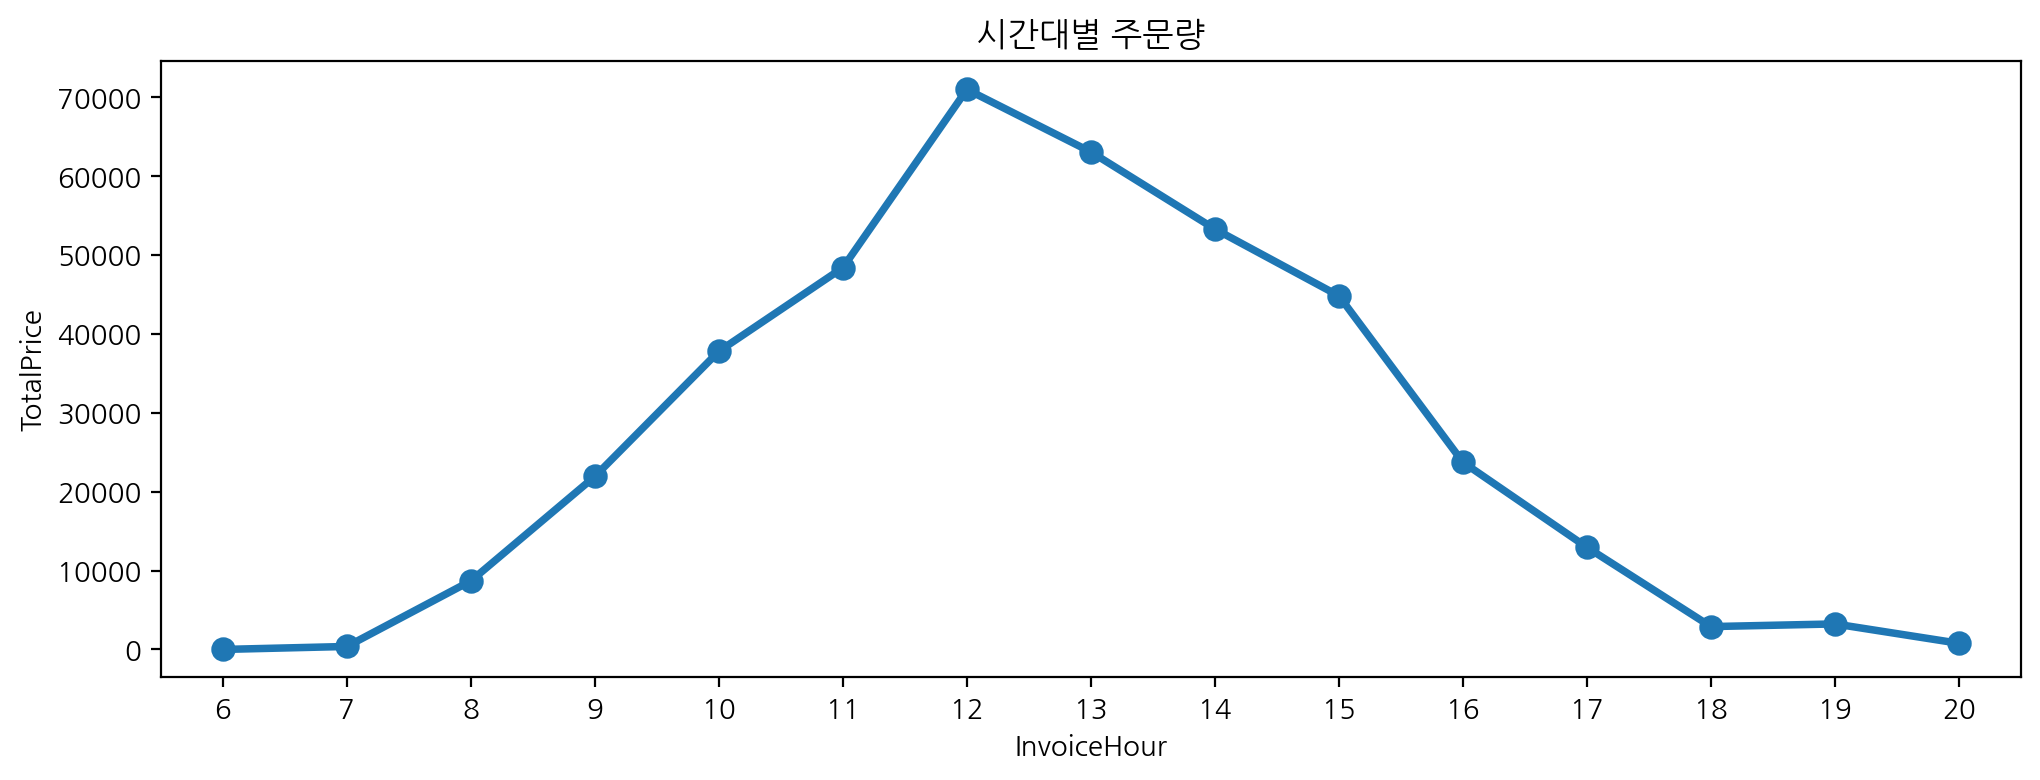

In [75]:
plt.figure(figsize=(12,4))
sns.pointplot(data=df_valid, x='InvoiceHour', y='TotalPrice', estimator=len, errorbar=None).set_title('시간대별 주문량')

Text(0.5, 1.0, '시간대별 매출액')

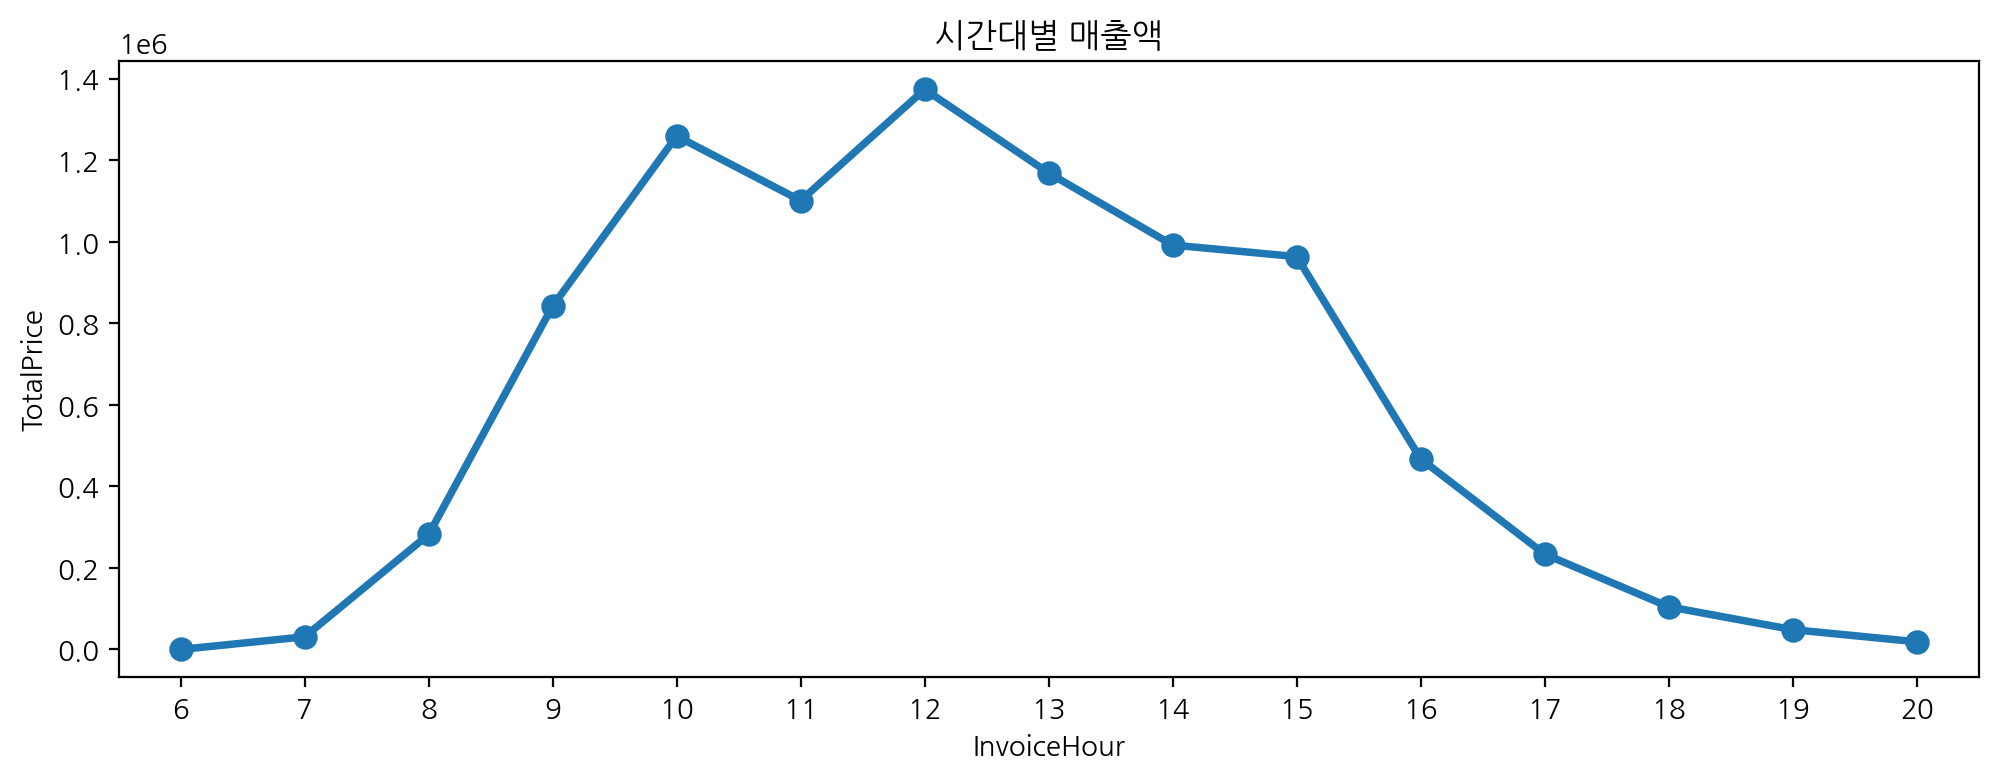

In [76]:
plt.figure(figsize=(12, 4))
sns.pointplot(
    data=df_valid, x="InvoiceHour", y="TotalPrice", estimator='sum', errorbar=None).set_title('시간대별 매출액')

In [88]:
list('월화수목금일')
hour_dow = pd.crosstab(df_valid["InvoiceHour"], df_valid["InvoiceDayName"])[
    list("월화수목금일")
]
hour_dow

InvoiceDayName,월,화,수,목,금,일
InvoiceHour,,,,,,
6,0,0,0,1,0,0
7,61,65,59,64,130,0
8,1563,1710,1818,1763,1833,0
9,4345,4542,4078,4569,4368,25
10,6106,6575,6927,7528,7161,3476
11,7401,8418,8292,7134,7189,9931
12,10585,11903,12684,12908,9765,13093
13,10459,10274,11137,11446,8300,11403
14,9119,9428,8716,9173,7227,9588


In [89]:
hour_dow.style.background_gradient(axis=None)

InvoiceDayName,월,화,수,목,금,일
InvoiceHour,,,,,,
6,0,0,0,1,0,0
7,61,65,59,64,130,0
8,1563,1710,1818,1763,1833,0
9,4345,4542,4078,4569,4368,25
10,6106,6575,6927,7528,7161,3476
11,7401,8418,8292,7134,7189,9931
12,10585,11903,12684,12908,9765,13093
13,10459,10274,11137,11446,8300,11403
14,9119,9428,8716,9173,7227,9588


In [90]:
print(plt.colormaps)

ColormapRegistry; available colormaps:
'magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 

In [101]:
hour_dow.style.background_gradient(axis=None, cmap="Blues").format('{:,}')

InvoiceDayName,월,화,수,목,금,일
InvoiceHour,,,,,,
6,0,0,0,1,0,0
7,61,65,59,64,130,0
8,"1,563","1,710","1,818","1,763","1,833",0
9,"4,345","4,542","4,078","4,569","4,368",25
10,"6,106","6,575","6,927","7,528","7,161","3,476"
11,"7,401","8,418","8,292","7,134","7,189","9,931"
12,"10,585","11,903","12,684","12,908","9,765","13,093"
13,"10,459","10,274","11,137","11,446","8,300","11,403"
14,"9,119","9,428","8,716","9,173","7,227","9,588"


<Axes: xlabel='InvoiceDayName', ylabel='InvoiceHour'>

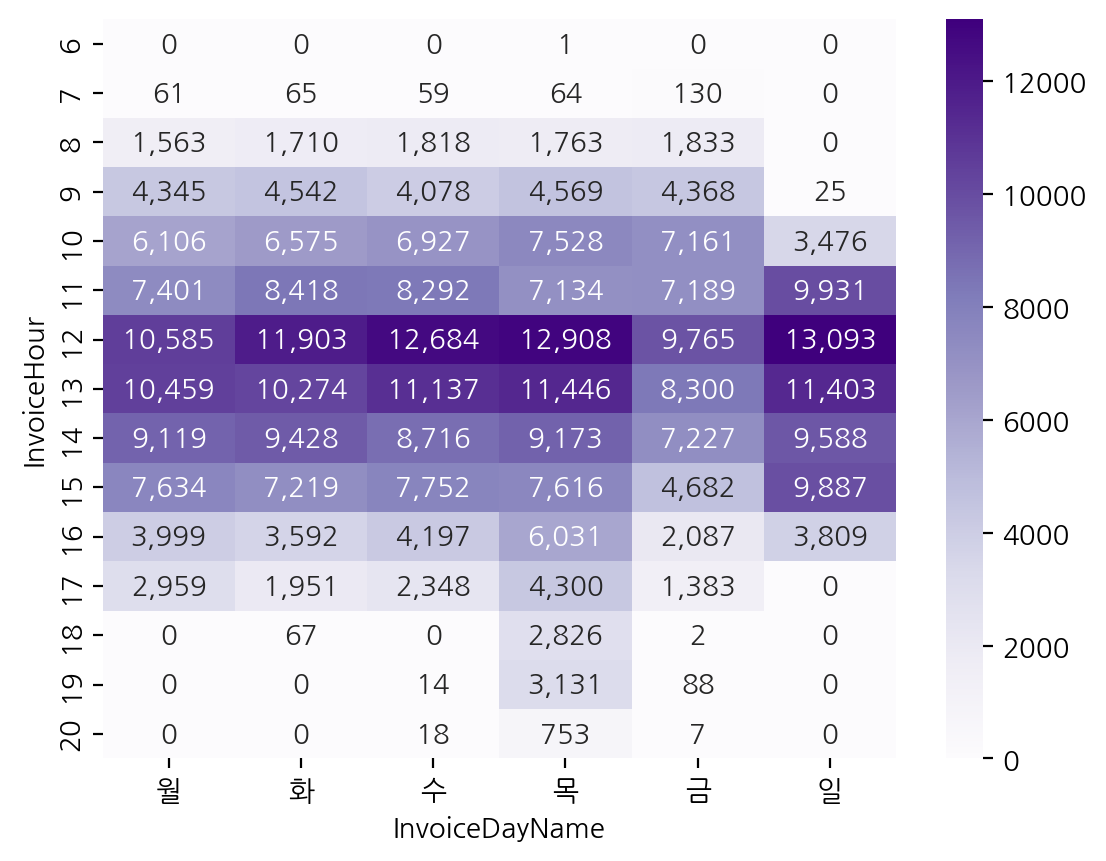

In [102]:
sns.heatmap(hour_dow, cmap='Purples', annot=True, fmt=',.0f')

<Axes: xlabel='InvoiceHour'>

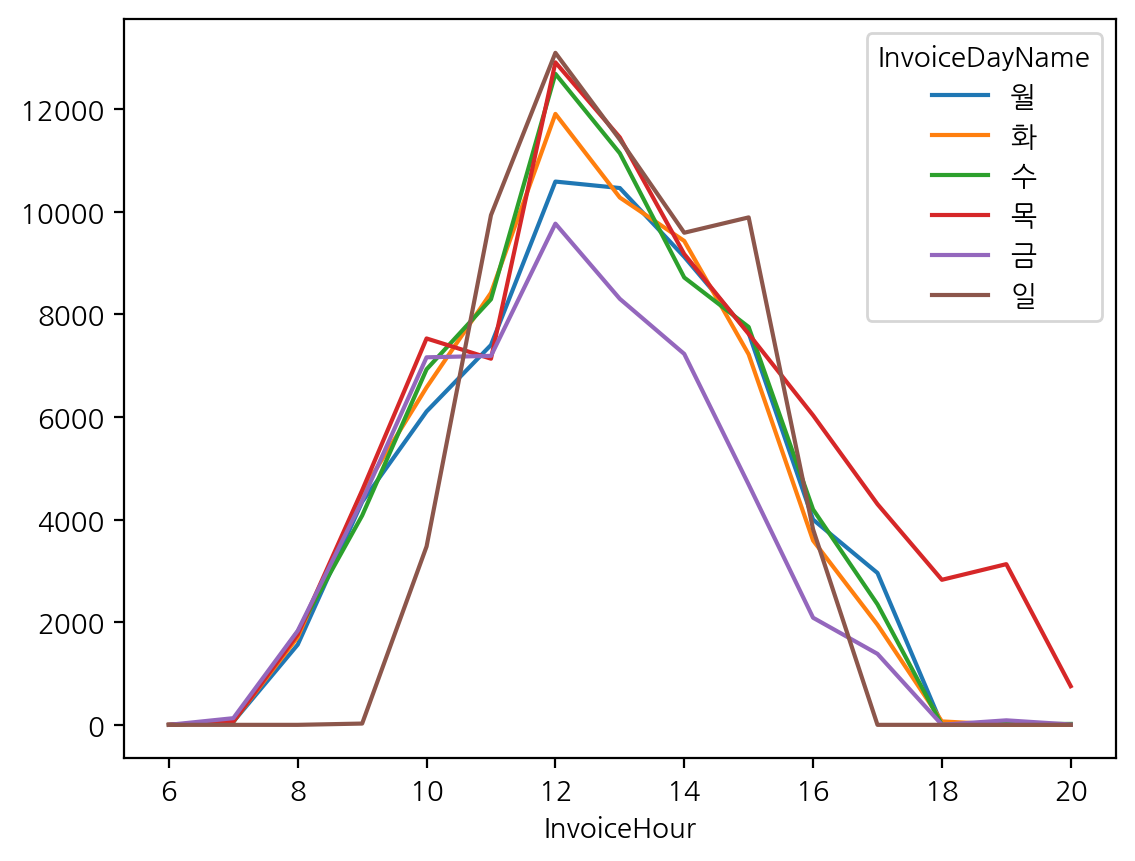

In [103]:
hour_dow.plot()

<Figure size 1200x800 with 0 Axes>

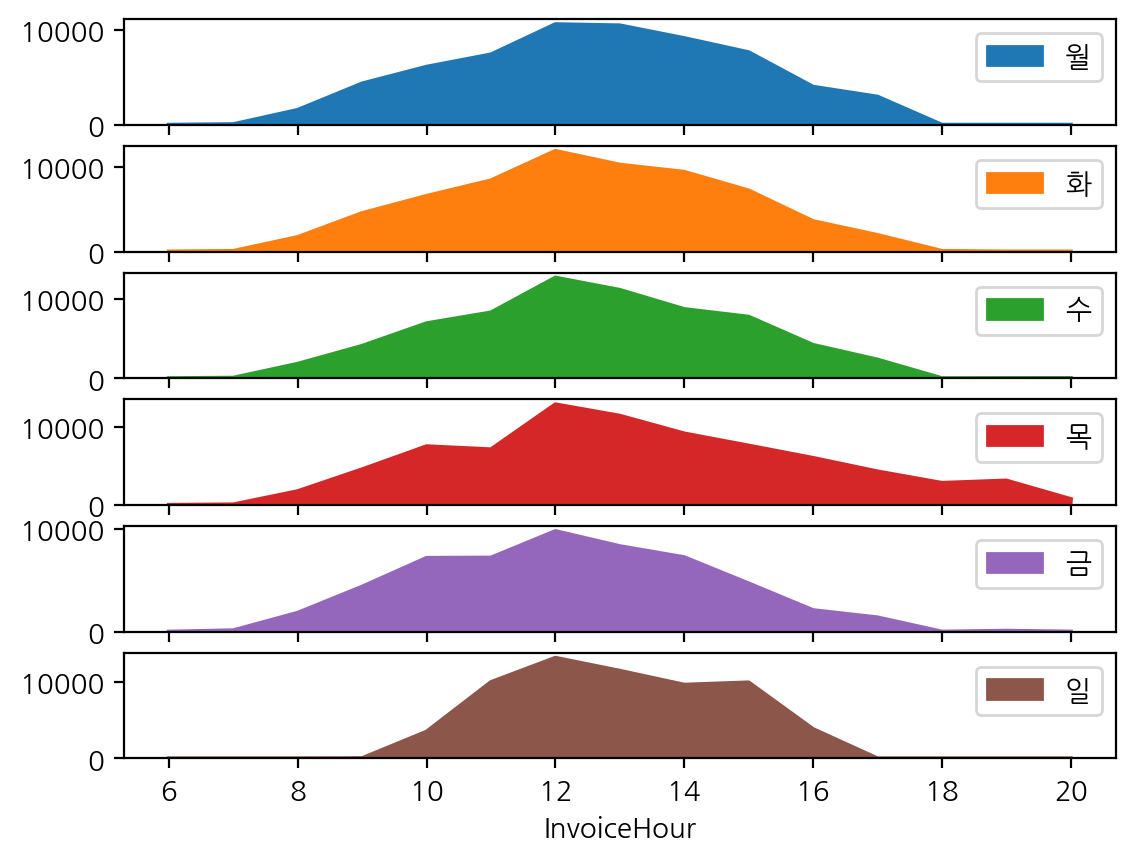

In [106]:
plt.figure(figsize=(12,8))
hour_dow.plot(subplots=True, kind='area');

3/7

In [113]:
arppu = df_valid.groupby(df_valid['InvoiceYM']).agg({'TotalPrice':'sum', 'CustomerID': 'nunique'})
arppu['ARPPU'] = arppu['TotalPrice'] / arppu['CustomerID']
arppu

,TotalPrice,CustomerID,ARPPU
InvoiceYM,,,
2010-12,570422.730,885,644.545458
2011-01,568101.310,741,766.668435
2011-02,446084.920,758,588.502533
2011-03,594081.760,974,609.940205
2011-04,468374.331,856,547.166275
2011-05,677355.150,1056,641.434801
2011-06,660046.050,991,666.040414
2011-07,598962.901,949,631.151634
2011-08,644051.040,935,688.824642


In [122]:
# InvoiceYM 으로 그룹화 하여 CustomerID 의 유일값의 개수를 구합니다.
# MAU
cust_agg = df_valid.groupby(df_valid["CustomerID"]).agg({'InvoiceNo': 'count', 'TotalPrice':['mean', 'sum']})

In [123]:
cust_agg.describe()

InvoiceNo    TotalPrice               
             count          mean            sum
count  4338.000000   4338.000000    4338.000000
mean     90.523744     68.381590    2048.688081
std     225.506968   1467.918294    8985.230220
min       1.000000      2.136970       3.750000
25%      17.000000     12.393196     306.482500
50%      41.000000     17.755000     668.570000
75%      98.000000     24.878950    1660.597500
max    7676.000000  77183.600000  280206.020000

array([[<Axes: title={'center': "('InvoiceNo', 'count')"}>,
        <Axes: title={'center': "('TotalPrice', 'mean')"}>],
       [<Axes: title={'center': "('TotalPrice', 'sum')"}>, <Axes: >]],
      dtype=object)

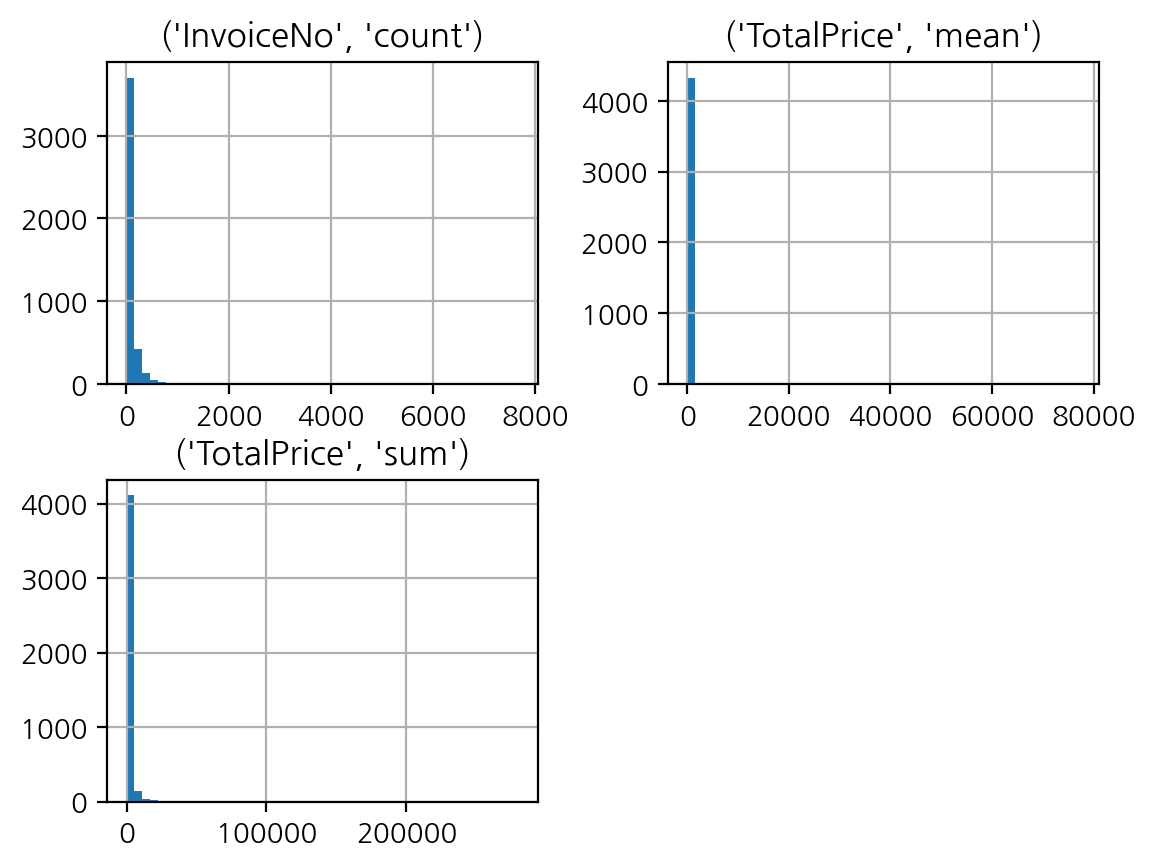

In [125]:
cust_agg.hist(bins=50)

<Axes: xlabel='InvoiceYM'>

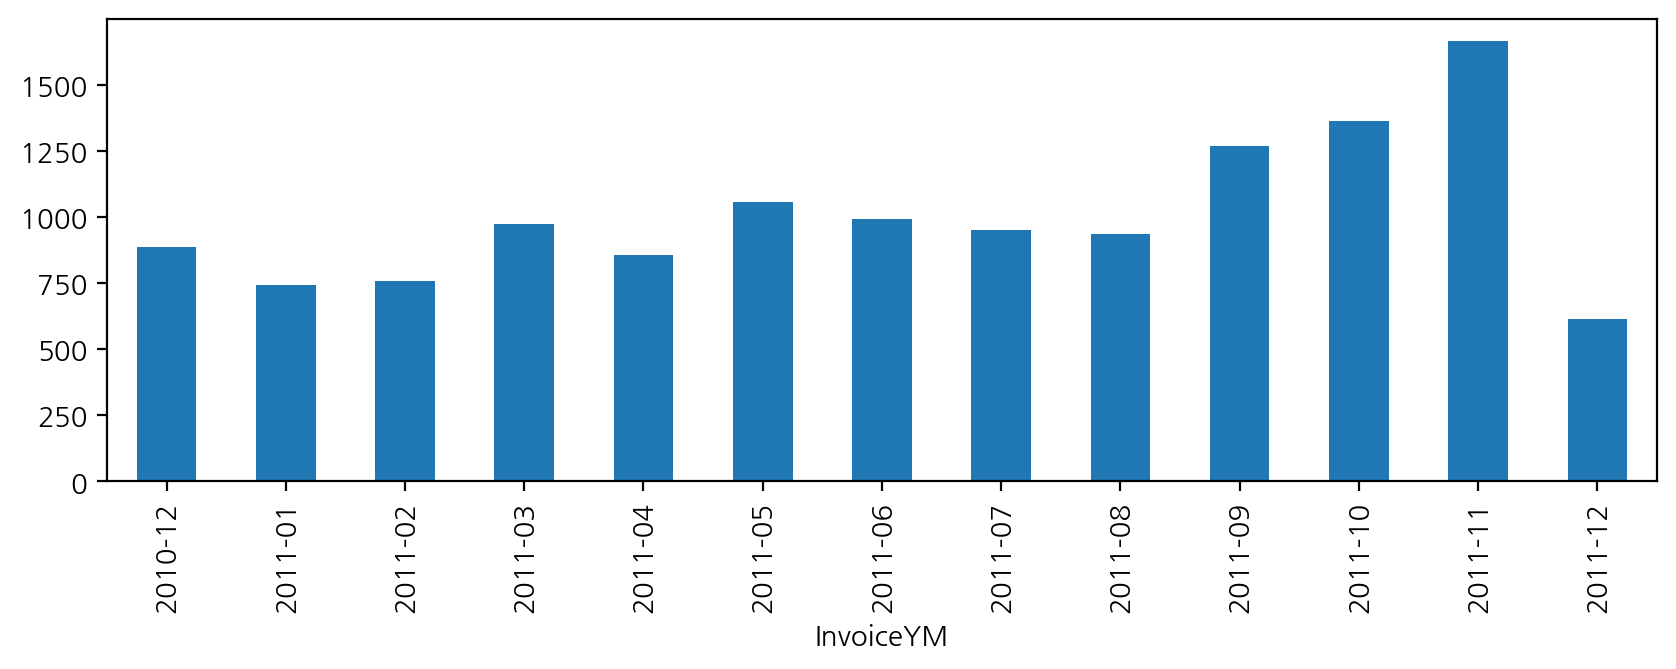

In [133]:
MAU = df_valid.groupby('InvoiceYM').agg('CustomerID').nunique()
MAU.plot.bar(figsize=(10,3))

월별, 주문건, 중복을 제외한 주문제품 종류

In [136]:
df_valid.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,isRegistered,InvoiceCode,isCancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceYM,InvoiceTime,InvoiceHour,InvoiceDayName
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,True,,False,2010,12,1,2,2010-12,08:26:00,8,수
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,True,,False,2010,12,1,2,2010-12,08:26:00,8,수
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,True,,False,2010,12,1,2,2010-12,08:26:00,8,수


In [145]:
# df_valid(유효고객, 유효주문)에 대해 월별 데이터(InvoiceYM)를 확인합니다.월별, 주문건, 중복을 제외한 주문제품 종류
# InvoiceNo 의 수
# StockCode, CustomerID 의 유일값의 수
# UnitPrice, Quantity, TotalPrice 의 sum
df_valid.groupby('InvoiceYM').agg({'InvoiceNo': 'count',
                                   'StockCode': 'nunique',
                                   'CustomerID': 'nunique',
                                   'UnitPrice': 'mean',
                                   'Quantity': 'sum',
                                   'TotalPrice': 'sum'})

,InvoiceNo,StockCode,CustomerID,UnitPrice,Quantity,TotalPrice
InvoiceYM,,,,,,
2010-12,25670,2411,885,3.142953,311048,570422.730
2011-01,20988,2121,741,3.155834,348473,568101.310
2011-02,19706,2124,758,3.177686,265027,446084.920
2011-03,26870,2234,974,3.269996,347582,594081.760
2011-04,22433,2217,856,3.501247,291366,468374.331
2011-05,28073,2219,1056,3.615606,372864,677355.150
2011-06,26926,2339,991,3.142043,363014,660046.050
2011-07,26580,2351,949,2.838771,367360,598962.901
2011-08,26790,2356,935,2.944274,397373,644051.040


[4/7]